In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [16]:
train_data=pd.read_csv('Corona_NLP_train.csv',encoding='latin1')
test_data=pd.read_csv('Corona_NLP_test.csv',encoding='latin1')

In [17]:
display(train_data),display(test_data)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


(None, None)

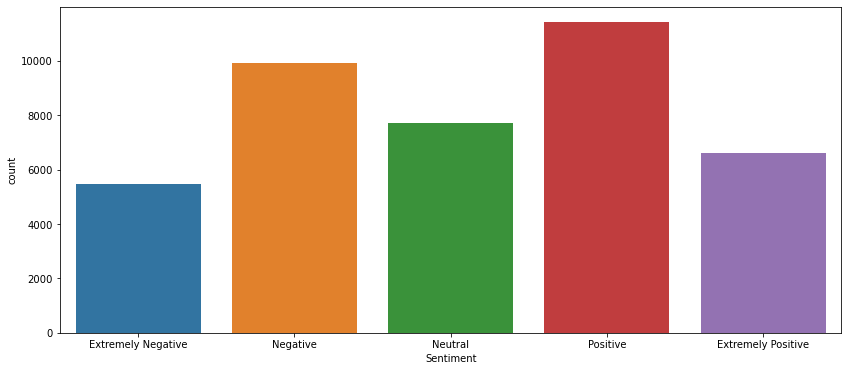

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(data=train_data, x='Sentiment', 
              order=["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"])

In [19]:
def makeSentencesBetter(data):
    X = data['OriginalTweet'].str.replace(r'http\S+', "")
    X = X.str.replace(r"#\S+", "")
    X = X.str.replace(r"@\S+", "")
    X = X.str.replace("\r", "")
    X = X.str.replace("\n", "")
    X = X.str.replace(r"[^\w\s]", "")
    X = X.str.lower()
    return X

In [29]:
X_train=makeSentencesBetter(train_data)
X_test=makeSentencesBetter(test_data)

In [30]:
def remove_stopwords(text):
    text_without_stopwords = list(filter(lambda i: i.strip() not in set(stopwords.words('english')), text.split()))
    return " ".join(text_without_stopwords)

In [31]:
X_train = X_train.apply(lambda word: remove_stopwords(word))
X_train

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one emptyplease dont panic enough f...
4        ready go supermarket outbreaknot im paranoid f...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid19 rel...
41154    know itâs getting tough rationing toilet paper...
41155             wrong smell hand sanitizer starting turn
41156    well newused rift going 70000 amazon rn althou...
Name: OriginalTweet, Length: 41157, dtype: object

In [37]:
count_vectorizer = TfidfVectorizer()
vec_X_train= count_vectorizer.fit_transform(list(X_train))
vec_X_test = count_vectorizer.transform(test_data['OriginalTweet'])

le = preprocessing.LabelEncoder()
le.fit(train_data['Sentiment'])
y_train = le.transform(train_data['Sentiment'])
y_test = le.transform(test_data['Sentiment'])

In [59]:
clf = LogisticRegression(random_state = 1,max_iter=500)
clf.fit(vec_X_train, y_train)
clf.score(vec_X_train,y_train)

0.8000340160847487

In [60]:
y_pred=clf.predict(vec_X_test)

In [61]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.5460768825697736

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
mnb.fit(vec_X_train,y_train)
mnb.score(vec_X_train,y_train)

0.5370167893675438